# 12 Reinforcement Learning 


![](https://drive.google.com/uc?id=1e3fTjnZLdR5skojks4zIzuc_qjsFgJZo)

Welcome to the 12th session in the Machine Learning practical series. In this session, we'll be deviating a little from Deep Learning, and studying about Reinforcement Learning, a slightly different field of Machine Learning, which uses a slightly different approach towards *learning*. Its a really interesting domain, and has lots of unexplored possibilities. So let's dive into an overview of what Reinforcement Learning is.

Imagine a real life scenario, how you learnt social behaviors. When you were really young, you did not necessarily know how to behave, and simply explored everything. In that, you did a lot of wrong things, and even some good things. Whenever you do a good thing, there was some sort of *reward* that you used to get. For example, maybe you scored good marks in your test when you were young, and your parents praised your effort, maybe even got you a gift. This reward is meant to encourage you to study more, and keep up your grades at school. On the other hand, you may have done a lot of "bad" things as well, and by bad, we mean, socially inacceptable actions, like, maybe, you broke something in your house, hurt your sibling, trashed the house, or picked up a curse word from somewhere. And immediately, you were *punished*, or *penalized* for it, maybe you got a scolding. So in the future, a subtle fear of this penalty would  stop you from doing it again (and if not, atleast make you think of it!). A really long history of rewards and penalties shapes us into socially acceptable humans. Now, it need not be just parents who reward/punish us, it can be other entities too - like, the society in general, including your immediate friend circle, the immediate surroundings, police and the courts, etc. This method of *learning* through rewards and penalties is called reinforced learning. An agent learns through constant reinforcement of ideas and tasks. 

This is completely different from traditional Supervised Learning. In Supervised Learning, the learning entity is shown multiple examples of a target, which we wish that the entitity learns to identify. That's not how we learn. We don't learn not to break things at home by watching millions of examples of other kids not doing the same. So, reinforcement learning does not entail elarning through example, but learning through trial and error, and a series of rewards and penalties. Pretty interesting, right?

So where is reinforcement learning used? Reinforcement Learning is used when we care about some result, without caring about what path is chosen to achieve the result. This result need not necessarily be  end goals, but also guidelines/goals that are to be followed throughout the learning process, like, what is good (reward-worthy) and what is bad (penalty worthy). The task is to maximise the reward, or minimize the penalty, or a mixture of both, depending on what the scenario is. So within these guidelines, on the basis of which rewards or penalties are given, our task is to learn to do something, and how we do it doesn't matter much. Let's take some real life examples of how reinforcement learning is used. 

In 2017, [DeepMind](https://deepmind.com/) developed a model called [AlphaGo Zero](https://deepmind.com/blog/article/alphago-zero-starting-scratch), which beat the world champion in the game of Go, which is a Chinese Game, considered to be one of the most difficult board games, because of the extremely large number of possible states that can be achieved in a game (about $3^{361}$ states in total, which is of the order of $10^{172}$ .Lets imagine what would be required to train a model that plays this game using a supervised learning approach. First of all it would simply not be possible to gather datasets of the scale of $10^{172}$. But to be fair, such an approach has been attempted, and was pretty successful too. DeepMind, the same company that developed AlphaGo Zero, developed [AlphaGo](https://deepmind.com/research/case-studies/alphago-the-story-so-far) in 2015, which used a supervised learning approach, and beat a professional Go player (which at the time, was a huge deal - the fact that an AI model could beat a human). The approach was simple - AlphaGo learnt the game by playing thousands of matches with amateur and professional players. This obviously wouldn't make it totally perfect, but would atleast make the model learn enough to pay decently well. 

AlphaGo Zero didn't use Supervised Learning, but used Reinforcement Learning. Instead of providing the model with a mechanism to learn features of a dataset, but with some guidelines of the game. And a mechanism to reward or penalize the model over its history of actions and the opponents actions (note: not just the last action is rewarded/penalized, but the entire history of actions matters in the end result. So rewards/penalities are determined by a series of actions). And AlphaGo Zero played millions of games against itself, making itself better each time, and reached a point where it beat the world champion in Go. Because of this, Google bought DeepMind for $600,000,000 (USD 600 Million).


Reinforcement Learning is really popular in applications that relate to understanding and developing the potential of Human-Computer Interactions, or human behavior in general. For example, DeepMind created this model (above) to gain insights about how humans might have evolved to walk the way that we do today, entirely from scratch. The only guidelines provided in this case was a physical form (having a torso having 2 legs), and the fact that the farther it can traverse, more the reward. 


If you wish to gain an intuition about the entire learning process of a Reinforcement Learning model, here is a video of an AI agent try to learn how to park a car.

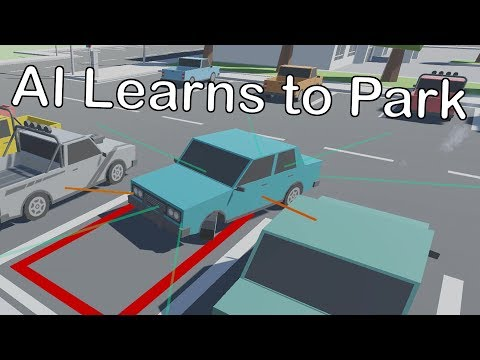

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('VMp6pq6_QjI')

Video Games are perfect environments for Reinforcement Learning models. Which is what we are going to do today. A lot of work has been done in developing Video Game interfaces to incorporate AI that can be trained by us. So we'll be learning how to apply reinforcement learning on a video game environment, as a proxy to how reinforcement learning can be applied in the real world, and even as a way to make this session interesting. 

Let us first discuss briefly what reinforcement learning is all about. Before that, let us install and import all necessary libraries. We'll be using PyTorch to run our model.

In [ ]:
!pip install box2d-py >./tmp
!pip3 install gym[Box_2D] --upgrade>./tmp
!pip install pyvirtualdisplay >./tmp
!sudo apt-get install xvfb >./tmp

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [ ]:
%matplotlib inline

In [ ]:
import gym
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML
from pyvirtualdisplay import Display

#display
display = Display(visible=0, size=(512, 512))
display.start()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.distributions import Categorical
device='cpu'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from datetime import datetime
from collections import Counter, deque
import warnings
warnings.filterwarnings("ignore")
import random
from collections import defaultdict, namedtuple, deque

## Reinforcement Learning with OpenAI Gym

[OpenAI](https://gym.openai.com/) provides us with a collection of interactive environments to test reinforcement learning systems, including many video game environments, and other graphic based interfaces, some simple, and others complex!  

In OpenAI's own terms - 

![](https://drive.google.com/uc?id=1PbpIEcjP0oapY8hgL--XI2DxqeVUvk0_)

Since we're already somewhat comfortable in PyTorch, we'll be using that in this session.

So, step number 1 is to create an environment where we'll be building our model. For the purpose of this session, we've picked a problem called the [Mountain Car](https://gym.openai.com/envs/MountainCar-v0/). The problem is simple:

>The goal is to drive up the mountain on the right; however, the car's engine is not strong enough to scale the mountain in a single pass. Therefore, the only way to succeed is to drive back and forth to build up momentum.

![](https://drive.google.com/uc?id=1NvAwZp1EhEgcmZKobtgtjHRYiSrtNf2J)

All we need to do to initialize this environment is one simple line of code as follows.

In [ ]:
env = gym.make('MountainCar-v0')
state = env.reset()

Before we start, let us talk about what goes into a reinforcement learning model. 

In Reinforcement Learning, we divide the universe into *agents* and *environments*. Agent is the entity that learns or interacts with other such agents. An agent performs within an environment, under some circumstances, and makes an *action* based on it. The action will lead it to reach some *state* of the environement (like, here, after some action (acceleration,etc), the car will reach some height). And each state comes with its own circumstances, to which the actor(agent) needs to adapt to, and come up with another suitable action from that point. 

Some actions will increase the *final reward*, while some may lead to failures. So we need to find an optimal path, through various states of the environement, that will lead to maximization of reward (in this case, reaching the topmost point).

Meaning, any action that leads to higher altitude, results in higher reward. We may not need any penalty in this case, but you can come up with a case that leads to some sort of penalty. So we represent the net reward ($reward - penalty$) as the *score*. 

So, for each environment, there is a finite set of state that can be achieved, and for each agent, only a finite set of actions can be taken. 

Corresponding to an action taken in a state, there is some reward (and/or penalty) that is associated. Our job is to *optimize* this action-reward pair such that this reward is maximized. This is the crux of all reinforcement learning systems. 

Let us see how this is implemented in the case of the Mountain Car problem.

### Random Actions and States

So at this point we have a car which really doesn't know how to reach the top of the right mountain, so it would be trying random actions. Let us see how it performs. 


In [ ]:
#this is a random action case
score = 0
t=0
frames = []
while True:
    action = np.random.choice([0,1,2]) #here, actions can be one (randomly chosen value) out of three values from 0,1 and 2. 
                                        #See the source code to understand what it means
    
    state, reward, done, info = env.step(action) #the step function is the functin that changes the state of the car. See the source code
    t+=1
    score+=reward #we care about the total reward of all actions
    
    #append frame
    frames.append(env.render(mode = 'rgb_array')) #env.render returns a graphical image of the actions taking place. 
                                                #Colab actually doesn't support dynamically changing popup windows, 
                                                #so we're first storing it in a list, and then we'll make a small gif out of it
    if done: break #done is a boolean variable. Which represents whether or not we have reached the end of the prediction cycle. 

print(f'Done in {t} timsteps with score {score}.') #just some book keeping stats

Done in 200 timsteps with score -200.0.


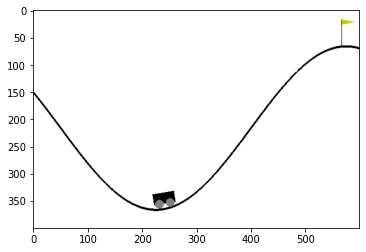

In [ ]:
#this little cell of code converts our frames list to a HTML embedding that can be played as a video clip
#animate frames
patch = plt.imshow(frames[0])
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 1)
HTML(ani.to_jshtml())

In order to understand what exactly is happening here, we need to dive into the [source code](https://github.com/openai/gym/blob/38a1f630dc9815a567aaf299ae5844c8f8b9a6fa/gym/envs/classic_control/mountain_car.py).

PS: if you're also a physics enthusiast, you'll enjoy reading the code.

In [ ]:
??gym.envs.classic_control.MountainCarEnv
#look for how actions are defined, how steps are taken and how scores are calculated.

We only have a crude prediction model, that randomly choses the action of the car at the very start. As OpenAI says, OpenAI Gym provides an environment, and its upto us to implement a model that can learn to do the specific task we need to do. 

### Creating an AI Model : Deep Reinforcement Learning

So we need to build a model that can predict actions appropriately in our environment. There are many learning models that have been developed specifically for reinforcement learning, like Markov Chain based models, and Q learning. But recently there has emerged a new type of modeling technique in reinforcement learning - What if this model is a *Neural Network*? (surprise surprise!), because, why not? Afterall what can be better for prediction than Neural Nets?! This is the state of the art reinforcement learning technique as of now. So, in the spirit of trying to learn the best, let us focus on Neural Nets for this session, and how it can be integrated with Reinforcement Learning. 

The goal of using Neural Nets is two fold - 
1. Not only Neural Nets are the best option when it comes to prediction, either in terms of regression or classification of values, but also
2. Other modeling techniques involve some mathematics, which we try to avoid in these sessions. We also know Neural Nets well, so its easier to understand as well. And then, we know that ultimately, there's no point in learning something in depth, which we would not use in the end.

But before that, let us set up some additional things that are common to all learning models. That is, we need a mechanism to store the states and actions of the past. Why do we need this? Obviously because we need to keep track of all transitional parameters. But also because, as we mentioned, rewards need to be assigned based on the entire action history. This is one feature of reinforcement learning - its not just the last action that determines the final state, but the entire set of actions taken. 

So we define a class that can store these parameters. What will be these parameters? We define them below in a tuple that we call *Transition*, that will be a tuple of parameters representing any transition (between actions, states and rewards). 

In [ ]:
Transition = namedtuple('Transition', ('state', 'action', 'reward', 'next_state','done'))

class Memory:
    def __init__(self, capacity, seed = 1412):
        self.capacity = capacity
        self.memory = deque(maxlen=capacity) #incase you only want to retain the last `capacity` number of states
        self.seed = random.seed(seed)

    def add(self, *args):
        t = Transition(*args)
        self.memory.append(t)

    def sample(self, batch_size):
        ts = random.sample(self.memory, batch_size)
        states = torch.from_numpy(np.vstack([t.state for t in ts])).float().to(device)
        actions = torch.from_numpy(np.vstack([t.action for t in ts])).float().to(device)
        rewards = torch.from_numpy(np.vstack([t.reward for t in ts])).float().to(device)
        next_states = torch.from_numpy(np.vstack([t.next_state for t in ts])).float().to(device)
        dones = torch.from_numpy(np.vstack([t.done for t in ts]).astype(np.uint8)).float().to(device)
        return(states,actions,rewards,next_states,dones) #the transition parameters

    def __len__(self):
        return(len(self.memory))

Let us now build our main model - The Neural Network that learns how to predict! In Reinforcement Learning, it has been given a fancy name - Deep Q Networks. Thats because its just a Deep Learning variant of Q learning. So we'll understand what Q learning is basically about, as we proceed. 


In [ ]:
#This class is just a structure for storing different things, including the model, its hyperparameters, the optimizer, the memory_storage, etc
class DQNAgent:
    def __init__(self, state_size = 2, action_size = 3, replay_memory = None, seed = 1412,
        lr = 1e-3 / 4, bs = 64, nb_hidden = 256, clip = 1.,
        gamma=0.99, tau= 1e-3, update_interval = 5, update_times = 1, tpe = 200):
        
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        self.npseed = np.random.seed(seed)
        self.lr = lr
        self.bs = bs
        self.gamma = gamma
        self.update_interval = update_interval
        self.update_times = update_times
        self.tau = tau
        self.losses = []
        self.tpe = tpe
        self.clip = clip

        #vanilla
        self.network_local = QNetwork(state_size, action_size, nb_hidden).to(device)
        self.network_target = QNetwork(state_size, action_size, nb_hidden).to(device)
        
        #dueling
#         self.network_local = DuelingNetwork(state_size, action_size, nb_hidden).to(device)
#         self.network_target = DuelingNetwork(state_size, action_size, nb_hidden).to(device)
        
        #optimizer. Adam optimizer, we even used this is CNNs
        self.optimizer = optim.Adam(self.network_local.parameters(), lr=self.lr)

        # replay memory
        self.memory = replay_memory
        # count time steps
        self.t_step = 0
        
    def get_eps(self, i, eps_start = 1., eps_end = 0.001, eps_decay = 0.9):
        eps = max(eps_start * (eps_decay ** i), eps_end)
        return(eps)
    
    def step(self, state, action, reward, next_state, done):
        #add transition to replay memory
        self.memory.add(state, action, reward, next_state, done)
        
        #update target network
        self.soft_update(self.network_local, self.network_target)
#         self.hard_update(self.network_local, self.network_target)
        
        # learn every self.t_step
        self.t_step += 1
        if self.t_step % self.update_interval == 0:
            if len(self.memory) > self.bs:
                #vanilla
                for _ in range(self.update_times):
                    transitions = self.memory.sample(self.bs)
                    self.learn(transitions)

    def act(self, state):
        eps = self.get_eps(int(self.t_step / self.tpe))
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.network_local.eval()
        with torch.no_grad():
            action_values = self.network_local(state)
        self.network_local.train()

        #epsilon greedy
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))
        
    def vanilla_loss(self,q_targets,q_expected):
        loss = F.mse_loss(q_expected,q_targets)
        return(loss)
        
    def learn(self, transitions, small_e = 1e-5):
        #vanilla
        states, actions, rewards, next_states, dones = transitions
        max_actions_next = self.network_local(next_states).detach().max(1)[1].unsqueeze(1)
        q_targets_next = self.network_target(next_states).detach().gather(1, max_actions_next.long())

        #compute loss
        q_targets = rewards + (self.gamma * q_targets_next) * (1 - dones) #this is the crux of Q learning. So this is how Deep Learning and Q learning have been combined.
        q_expected = self.network_local(states).gather(1, actions.long())
        #vanilla
        loss = self.vanilla_loss(q_expected, q_targets)
        #append for reporting
        self.losses.append(loss)
        
        #backprop
        self.optimizer.zero_grad()
        loss.backward()
        if self.clip: torch.nn.utils.clip_grad_norm(self.network_local.parameters(), self.clip)
        self.optimizer.step()
      
    def hard_update(self, local_model, target_model):
        if self.t_step % 1/self.tau==0:
            target_model.load_state_dict(local_model.state_dict())
            
    def soft_update(self, local_model, target_model):
        """Soft update model parameters.
        Î¸_target = Ï„*Î¸_local + (1 - Ï„)*Î¸_target
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(self.tau*local_param.data + (1.0-self.tau)*target_param.data)

Now let us simply define our model, which is simply a Neural Network. For this we'll be using a simple Fully Connected, 3 Layer Neural Network.

In [ ]:
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size, nb_hidden, seed=1412):
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.model = nn.Sequential(
            nn.Linear(state_size, nb_hidden),
            nn.ReLU(),
            nn.Linear(nb_hidden, nb_hidden),
            nn.ReLU(),
            nn.Linear(nb_hidden, action_size)
        )
    def forward(self, state):
        x = self.model(state)
        return(x)

That's it. Now let us see how to train this model for our particular problem.

Try changing the hyperparameters once you run this model using what has been provided to you.

In [ ]:
#initializing the environment, the model and memory states

env = gym.make('MountainCar-v0') #reinitializing the environment
mem = Memory(capacity=int(1e3)) #always store `capacity` timesteps
a = DQNAgent(state_size = 2, action_size = 3, replay_memory = mem, seed = 1412,
        lr = 1e-3, #learning rate; try something between 1e-4 and 1e-3
        bs = 64, #batch size; try 64, 128, 256
        clip = 1., #gradient clipping
        nb_hidden = 64, #number of hidden units in the q network; try 64,128,256,512
        gamma = 0.99, #discount factor
        tau= 1e-3, #how fast we update the target network; try something between 1e-2 and 1e-3
        update_interval = 5,  #how often we update local network
        update_times = 1, #how many times you train the local network per update
        tpe = 200) #how many timesteps per episode

Let us train the model. You can read the DQNAgent class properly to understand (braodly) what's happening. You don't need to memorize any method per se. 

In [ ]:
scores = []
scores_deque = deque(maxlen=100) 
moving_scores = []
start_time = datetime.now()

for i in tqdm_notebook(range(1000)): #training for 1000 epochs.
    if (i+1) % 100==0: print(f'Episode {i} Moving Average: {np.mean(scores_deque)}')
    state = env.reset()
    score = 0
    t=0
    while True:
        t+=1
        #select action
        action = a.act(state)  #there's a threshold based function that chooses the action based on the present state

        #env step
        next_state, reward, done, info = env.step(action)   #inbuilt function. Nothing for us to worry about
        
        #You can engineer the reward to motive your agent even more
        reward_ = reward

        #agent step
        a.step(state,action,reward_,next_state,done)
        
        #collect score
        score += reward
        
        #go to next state
        state = next_state   
        
        #break if done
        if done: break
            
    #book keeping
    scores.append(score)
    scores_deque.append(score)
    moving_scores.append(np.mean(scores_deque))
        
    #solved at -110; easy solve at -150
    if moving_scores[-1] > -110: 
        print(f'Solved at Play {i}: {datetime.now() - start_time} Moving average: {moving_scores[-1]}')
        break

Episode 99 Moving Average: -194.2828282828283
Episode 199 Moving Average: -195.75
Episode 299 Moving Average: -193.9
Episode 399 Moving Average: -179.08
Episode 499 Moving Average: -156.28
Episode 599 Moving Average: -145.51
Episode 699 Moving Average: -146.57
Episode 799 Moving Average: -185.79
Episode 899 Moving Average: -185.13
Episode 999 Moving Average: -198.48



On closer inspection, you'll notice there is not much difference between the broader methods of Deep Learning and Reinforcement Learning. There is some sort of connections between the parametric approach of deep learning and reinforcement learning, and the optimization method. There are hyperparameters that need to be optimized, and the reward is loosely related to the loss function. I stress on the word "loose" because in actual, theorists will tell you (correctly), the approaches are quite far apart. My goal of stating this point is, to point out the learning approach in all of AI, which has some common themes. 


Let us plot the losses, and rewards

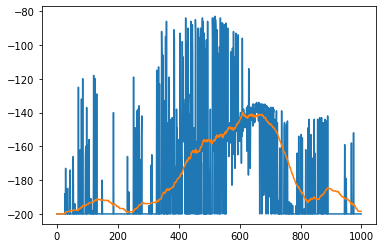

In [ ]:
plt.plot(scores)
plt.plot(moving_scores)

In the plot above, we've plotted the scores, which is nothing but the reward over the training cycle. The higher the better! So you can see, that around 600-700 epochs, the reward maximized. 

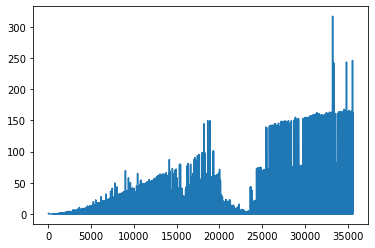

In [ ]:
plt.plot(a.losses)

In this plot, we show the *losses* from the Neural Network. You can see, that after about 25000 batches, the loss is at its minimum. (Which is around the same time as the reward maximized). 

So, we may interpret that the model fits well around this point, and sort of overfits beyond that. So you may change the number of epochs too, while optimizing this model.

### Model Inference 

Well, we've trained the model, and interpreted it. But let's see it working! So here, we reinitialize the environment (bring the car to its initial state), and run our model on it. Its as simple as feedforwarding states through the network, 

In [ ]:
env = gym.make('MountainCar-v0')
state = env.reset()
score = 0
t=0
frames = []
for i in range(200):
    #only infer action; no training
    action = a.act(state)
    
    #env step
    state, reward, done, info = env.step(action)
    
    #book keeping
    t+=1
    score+=reward
    
    #break if done
    if done: break
    
    #append frame
    frames.append(env.render(mode = 'rgb_array'))
print(f'Done in {t} timsteps with score {score}.')

Done in 200 timsteps with score -200.0.


And finally, let's run the cell that we used to animate the results.

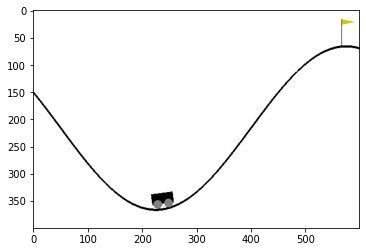

In [ ]:
patch = plt.imshow(frames[0])
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 1)
HTML(ani.to_jshtml())

That's definitely an improvement. You can optimize this model by changing hyperparameters, the model architecture, or the optimizer. But, the most significant change can come simply by optimizing the hyperparameters, without touching the model or optimizer. 

However, for those, who really want to experiment above and beyond, certainly do free to change the model architecture, optimizer, or anything else that you feel necessary.

## Exercise 

This is a subjective exercise, meaning everyone may have different results. Your task is to optimize this model by changing different things (mostly hyperparameters, but again, you are free to experiment with other things). Try making this model work perfectly. Our ideal goal would be to make the car reach the top in one go! 

In [ ]:
env = gym.make('MountainCar-v0') #reinitializing the environment
mem = Memory(capacity=int(1e3)) #always store `capacity` timesteps
a = DQNAgent(state_size = 2, action_size = 3, replay_memory = mem, seed = 1412,
        lr = 5e-4, #learning rate; try something between 1e-4 and 1e-3
        bs = 64, #batch size; try 64, 128, 256
        clip = 1., #gradient clipping
        nb_hidden = 64, #number of hidden units in the q network; try 64,128,256,512
        gamma = 0.99, #discount factor
        tau= 1e-3, #how fast we update the target network; try something between 1e-2 and 1e-3
        update_interval = 5,  #how often we update local network
        update_times = 1, #how many times you train the local network per update
        tpe = 200) #how many timesteps per episode

In [ ]:
scores = []
scores_deque = deque(maxlen=100) 
moving_scores = []
start_time = datetime.now()

for i in tqdm_notebook(range(1000)): 
    if (i+1) % 100==0: print(f'Episode {i} Moving Average: {np.mean(scores_deque)}')
    state = env.reset()
    score = 0
    t=0
    while True:
        t+=1
        #select action
        action = a.act(state)  #there's a threshold based function that chooses the action based on the present state

        #env step
        next_state, reward, done, info = env.step(action)   #inbuilt function. Nothing for us to worry about
        
        #You can engineer the reward to motive your agent even more
        reward_ = reward

        #agent step
        a.step(state,action,reward_,next_state,done)
        
        #collect score
        score += reward
        
        #go to next state
        state = next_state   
        
        #break if done
        if done: break
            
    #book keeping
    scores.append(score)
    scores_deque.append(score)
    moving_scores.append(np.mean(scores_deque))
        
    #solved at -110; easy solve at -150
    if moving_scores[-1] > -110: 
        print(f'Solved at Play {i}: {datetime.now() - start_time} Moving average: {moving_scores[-1]}')
        break

Episode 99 Moving Average: -198.96969696969697
Episode 199 Moving Average: -195.11
Episode 299 Moving Average: -196.69
Episode 399 Moving Average: -195.82
Episode 499 Moving Average: -197.71
Episode 599 Moving Average: -188.15
Episode 699 Moving Average: -173.35
Episode 799 Moving Average: -132.99
Episode 899 Moving Average: -144.41
Episode 999 Moving Average: -150.58



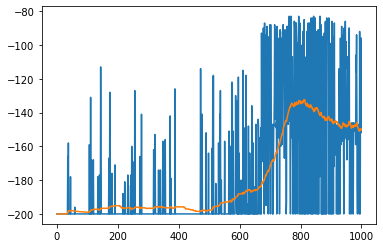

In [ ]:
plt.plot(scores)
plt.plot(moving_scores)

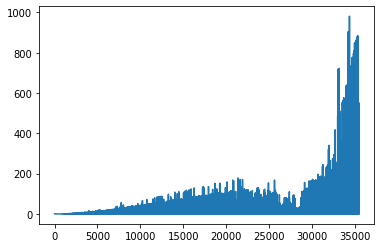

In [ ]:
plt.plot(a.losses)

In [ ]:
env = gym.make('MountainCar-v0')
state = env.reset()
score = 0
t=0
frames = []
for i in range(200):
    #only infer action; no training
    action = a.act(state)
    
    #env step
    state, reward, done, info = env.step(action)
    
    #book keeping
    t+=1
    score+=reward
    
    #break if done
    if done: break
    
    #append frame
    frames.append(env.render(mode = 'rgb_array'))
print(f'Done in {t} timsteps with score {score}.')

NameError: ignored

In [ ]:
patch = plt.imshow(frames[0])
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 1)
HTML(ani.to_jshtml())